# Machine Learning for Breast Cancer Wisconsin

Investigating machine learning methods for classification of Wisconsin Breast Cancer data.

The data is publicly available. 
Detailed Information about the data set at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

Data dimension: (569, 33)
-----------------------------------
col_0      count
diagnosis       
B            357
M            212


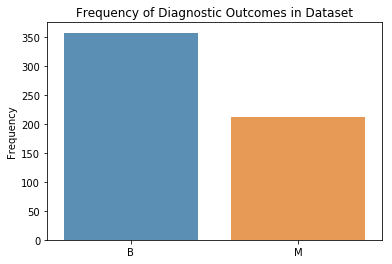

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Read the file
path = "/Users/yaldazare/Desktop/DataScience/DS_PROJECTS/Breast_Cancer/breastCancerWI.csv"
dat = pd.read_csv(path)
dat.head()
print("Data dimension: " + str(dat.shape))
print("-----------------------------------")

#Missing values?
dat.isnull().sum()
dat.isna().sum()


#Number of Benign and Malignant samples
counts = pd.crosstab(index=dat.diagnosis,  columns="count")
print(counts)

#Barblot for the frequency of Benign vs Malignant
sns.barplot(x = ['B', 'M'], y = 'count', data = counts, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

#drop columns we don't need
dat = dat.drop(['Unnamed: 32', 'id'], axis = 1)
dat.head()

# Features Exploration

In [166]:
#Get a summary statistics
dat.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


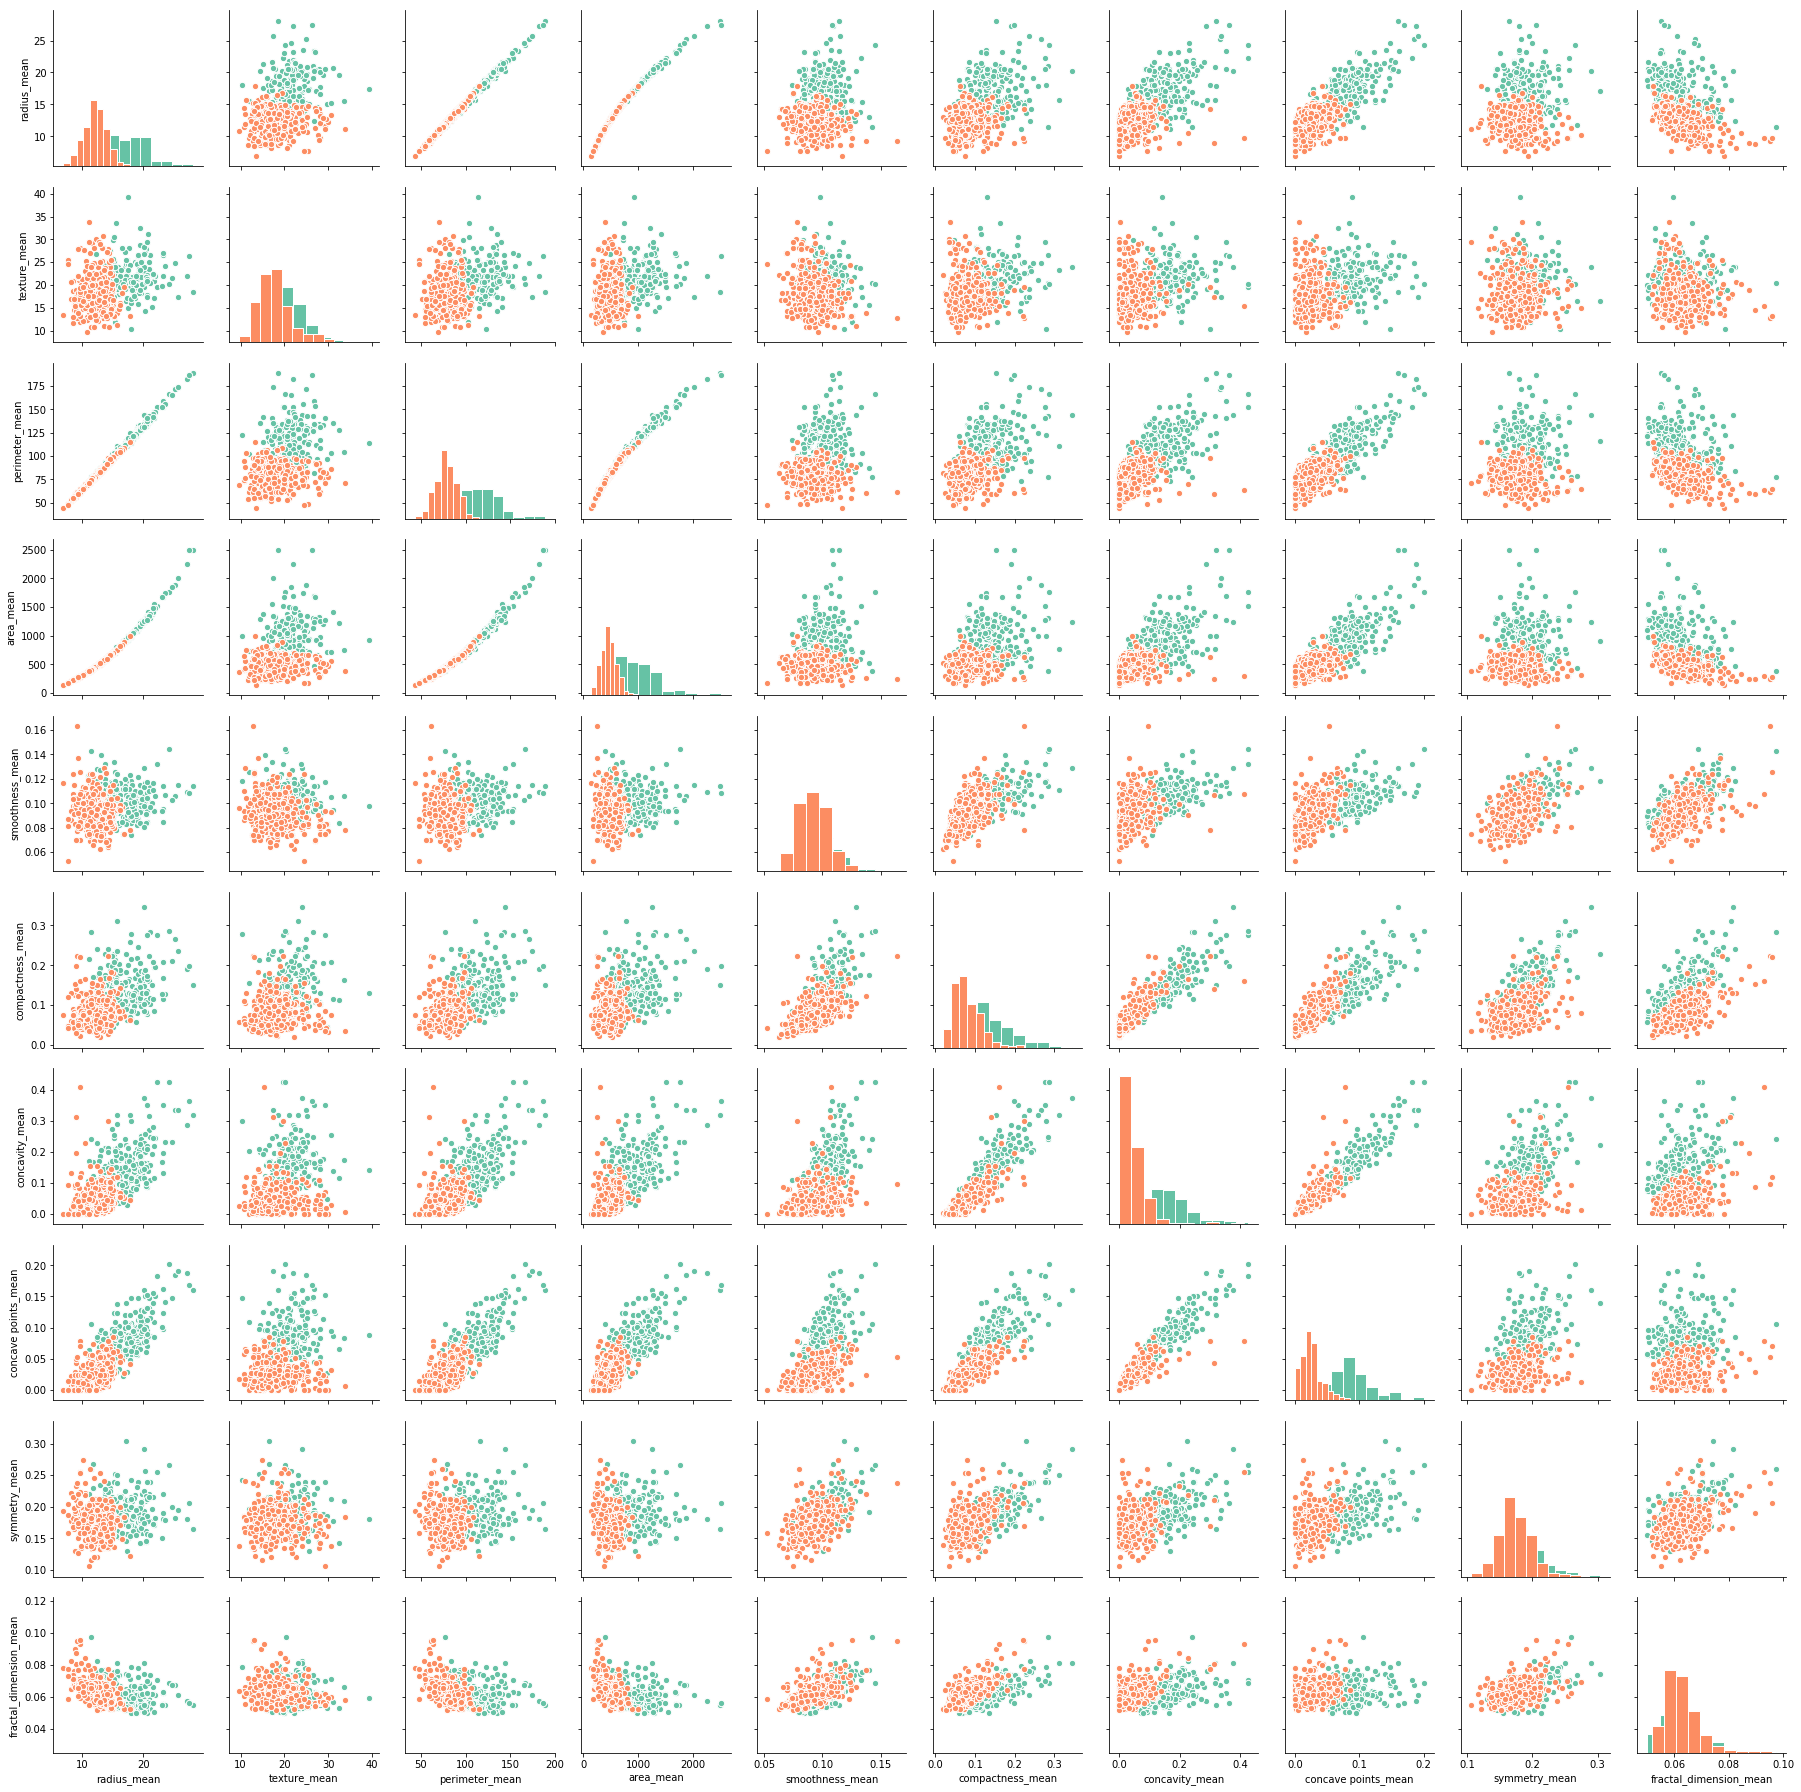

In [5]:
#features relationship
#the first 10 features 
g = sns.PairGrid(dat.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

Some of the features such as "radius-mean and perimeter_mean" are 100% correlated (straight line).

In [6]:
#Re-labeling response variable (Alternative way):
# labelencoder_y = LabelEncoder()
# Y = labelencoder_y.fit_transform(dat.diagnosis)

#re-label B (Benign) and M (Malignant) to 0 and 1, respectively
dat['diagnosis']=dat['diagnosis'].map({'M':1,'B':0})

#Dignosis column is our target or response variable
y = dat.diagnosis

#drop the response variable
dat = dat.drop(['diagnosis'], axis = 1)


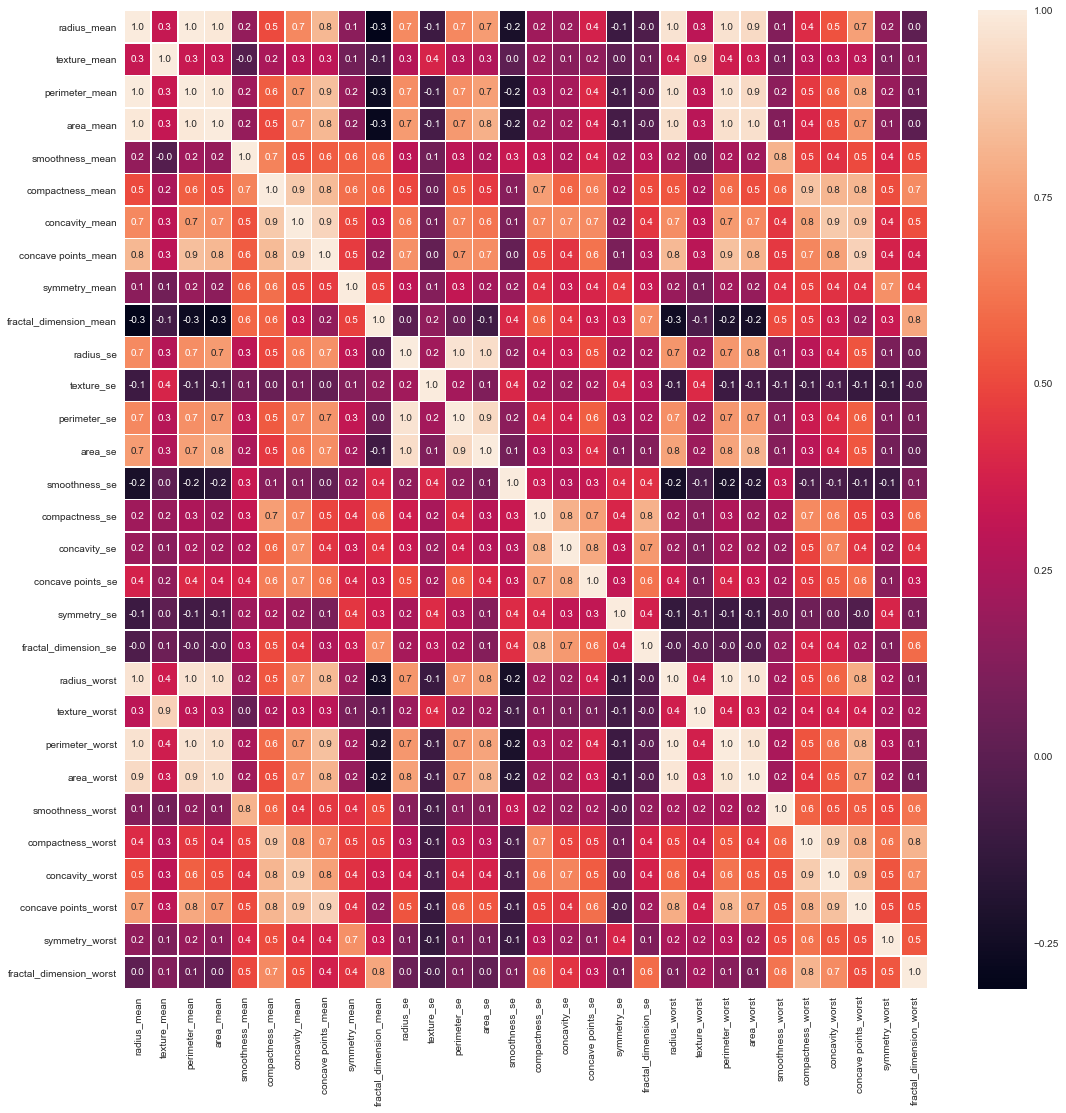

In [169]:
#Some exploration to understand the relationship between features
#Explore correlation between features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dat.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


Some features are highly correlated, for example radius_mean and radious_worst.
Although existence of colinearity among features in the data can affect model performance, I will leave them in and let the algorithm and regularization takes care of any noise that is introduced by these features.
Also, some of these features are highly correlated but also correlated with other features at varrying degrees. So removing highly correlated features is not always a good idea.

In [170]:
#features come in three groups of "mean", "se" and "worst" and there are 10 different tummor measurments 
#in each group
#Ten real-valued features are computed for each cell nucleus: 

# a) radius (mean of distances from center to points on the perimeter) 
# b) texture (standard deviation of gray-scale values) 
# c) perimeter 
# d) area 
# e) smoothness (local variation in radius lengths) 
# f) compactness (perimeter^2 / area - 1.0) 
# g) concavity (severity of concave portions of the contour) 
# h) concave points (number of concave portions of the contour) 
# i) symmetry 
# j) fractal dimension ("coastline approximation" - 1)

mean = list(dat.columns[0:10])
se = list(dat.columns[10:20])
worst = list(dat.columns[20:30])
print(mean)
print("-----------------------------------")
print(se)
print("-----------------------------------")
print(worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
-----------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Feature Extraction

Dimension reduction techniques such as PCA is used to find the first principle components with largest contribution to the variation. 

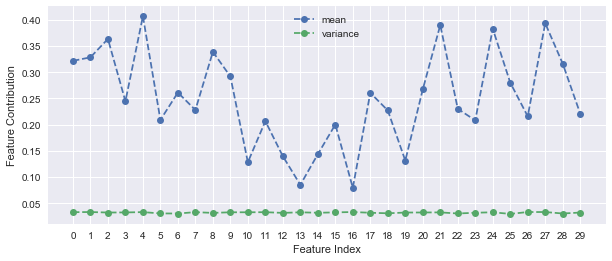

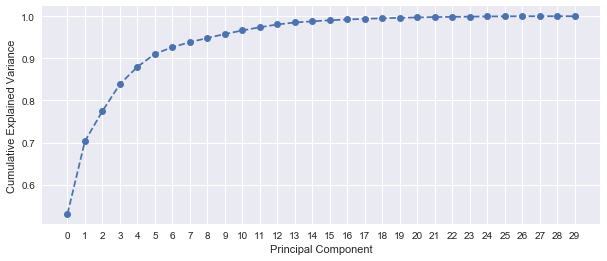

In [7]:
#Principle Component Analysis
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(dat)

pca = PCA(30)
pca.fit(dat)
dat_pca = pca.transform(dat)

projected_scaled = pca.fit_transform(features_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()



6 features explain >90% of the variance in teh data.

### Split the data and Standardization

In [11]:
# split data to train 70% and test 30% sets
x_train, x_test, y_train, y_test = train_test_split(dat, y, test_size=0.3, random_state=42, 
                                                    shuffle=True,  stratify=y)

#check if the split worked
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [357 212]
Labels counts in y_train: [250 148]
Labels counts in y_test: [107  64]


In [12]:
#Standardization of features
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_std = scaler.transform(x_train)

#Fit and transformation can also be combined in one line (Altrenative)
# Fitting only on training set, transformation on both training and testing sets
# scaler = preprocessing.StandardScaler()
# x_train = scaler.fit_transform(x_train)

x_test_std = scaler.transform(x_test) 


# Fitting Machine Learning Algorithms

# Decision Tree

In [13]:
#Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=42)
model_DT = tree.fit(x_train_std, y_train)

prediction_tr = model_DT.predict(x_train_std) #prediction of training
prediction_ts = model_DT.predict(x_test_std) #prediction of testing
 

#Performance metrics
print('Accuracy TR: {0:.2f}'.format(accuracy_score(prediction_tr, y_train)))
print('Accuracy TS: {0:.2f}'.format(accuracy_score(prediction_ts, y_test)))

#cross-validation
dt_acc = cross_val_score(model_DT,x_train_std, y_train, cv=10, scoring='accuracy')
print('Accuracy CV: {0:.2f}'.format(dt_acc.mean()))


Accuracy TR: 0.97
Accuracy TS: 0.93
Accuracy CV: 0.92


# Random Forest

In [14]:
#fit a simple random forest model
model_RF=RandomForestClassifier(n_estimators=100, random_state=42)

#print(model.fit(x_train, y_train))
print(model_RF.fit(x_train_std, y_train))

#prediction of training
prediction_tr = model_RF.predict(x_train_std) 

#predict the test data
prediction_ts = model_RF.predict(x_test_std) 

#Performance metrics
print('Accuracy TR: {0:.2f}'.format(accuracy_score(prediction_tr, y_train)))
print('Accuracy TS: {0:.2f}'.format(accuracy_score(prediction_ts, y_test)))

#cross-validation
rf_acc = cross_val_score(model_RF,x_train_std, y_train, cv=10, scoring='accuracy')
print('Accuracy CV: {0:.2f}'.format(rf_acc.mean()))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Accuracy TR: 1.00
Accuracy TS: 0.96
Accuracy CV: 0.95


With training accuracy of 1 (testing acc. 0.96) for Ranom Forest model and 0.97 and (0.92) for Decision Tree, it's clear that there is overfitting in these two models. Random Forest generally tends to overfit the training data. Later when we look at optimization, this overfitting will be accounted for. 
The accuracy of a 10-fold cross-validation of 0.94 for Ranodm Forest vs. 0.92 for Decision tree is in line with what we expected because Random Forest is an ensemble model that combines many decision trees.

### Random Forest Feature Importance

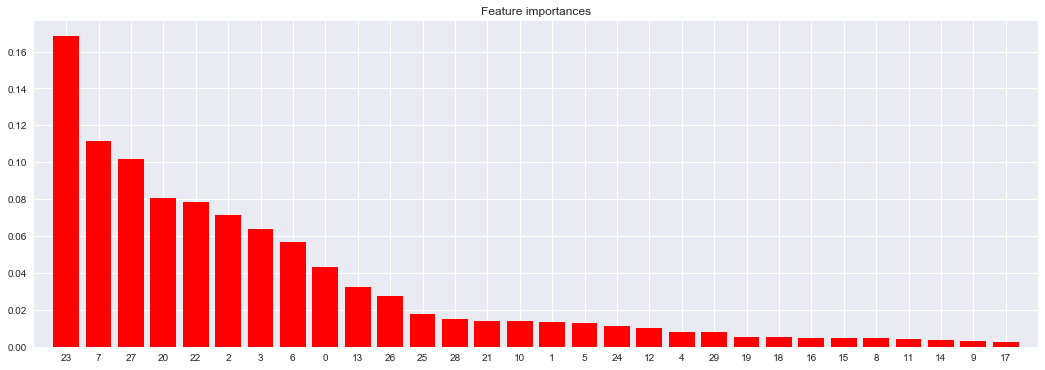

,Index,Feature,Importance
0,23,area_worst,0.168343
1,7,concave points_mean,0.111414
2,27,concave points_worst,0.101730
3,20,radius_worst,0.080520
4,22,perimeter_worst,0.078514
5,2,perimeter_mean,0.071684
6,3,area_mean,0.063877
7,6,concavity_mean,0.056572
8,0,radius_mean,0.043004
9,13,area_se,0.032464


In [47]:
#Looking at feature importance for feature selection
importances = model_RF.feature_importances_

# std = np.std([tree.feature_importances_ for tree in model_RF.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]
# for f in range(dat.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,6))
plt.title("Feature importances")
plt.bar(range(dat.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(dat.shape[1]), indices)
plt.xlim([-1, dat.shape[1]])
plt.show()
#print(dat.columns[indices])
imp_df = pd.concat([pd.DataFrame(indices),pd.DataFrame(dat.columns[indices]),
                    pd.DataFrame(importances[indices])], axis = 1)
imp_df.columns = ['Index','Feature','Importance']
#imp_df = pd.DataFrame(imp_df, index=)
imp_df

# Support Vector Machine

In [256]:
#Support vector machine
model_SVM = svm.SVC(kernel ='linear', random_state= 42)
print(model_SVM.fit(x_train_std, y_train))

#prediction of training
prediction_tr = model_SVM.predict(x_train_std)
#prediction of testing
prediction_ts = model_SVM.predict(x_test_std)


print('Accuracy TR: {0:.2f}'.format(accuracy_score(prediction_tr,y_train)))
print('Accuracy TS: {0:.2f}'.format(accuracy_score(prediction_ts,y_test)))

#cross-validation
svm_acc = cross_val_score(model_SVM,x_train_std, y_train, cv=10, scoring='accuracy')
print('Accuracy CV: {0:.2f}'.format(svm_acc.mean()))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
Accuracy TR: 0.99
Accuracy TS: 0.96
Accuracy CV: 0.96


# Logistic Regression

In [258]:
#Logistic Regression
model_LR = LogisticRegression(random_state= 42, solver='liblinear')
print(model_LR.fit(x_train_std, y_train))

#prediction of training
prediction_tr = model_LR.predict(x_train_std)
prediction_ts = model_LR.predict(x_test_std) #testing

print('Accuracy TR :{0:.2f}'.format(accuracy_score(prediction_tr,y_train)))
print('Accuracy TS :{0:.2f}'.format(accuracy_score(prediction_ts,y_test)))
print("    ")

cof_mat = confusion_matrix(y_test, prediction_ts)
print("Confusion Matrix:")
print(cof_mat)
print("    ")

#cross-validation
lr_acc = cross_val_score(model_LR,x_train_std, y_train, cv=10, scoring='accuracy')
print('Accuracy CV: {0:.2f}'.format(lr_acc.mean()))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy TR :0.99
Accuracy TS :0.97
    
Confusion Matrix:
[[106   1]
 [  4  60]]
    
Accuracy CV: 0.97


In [259]:
#compare CV accuracies of the three modesl fitted so far
print('CV Accuracy RF: {0:.2f}'.format(rf_acc.mean()))
print('CV Accuracy SVM: {0:.2f}'.format(svm_acc.mean()))
print('CV Accuracy LR: {0:.2f}'.format(lr_acc.mean()))

CV Accuracy RF: 0.95
CV Accuracy SVM: 0.96
CV Accuracy LR: 0.97


Logistic regression is performing slightly better than RF and SVM for classification of this data.


## ROC Curves

AUC Score (logistic regression): 0.99 


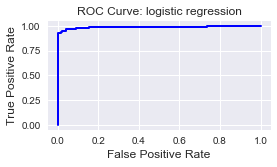

AUC Score (random_forest): 0.98 


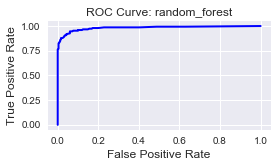

In [260]:
#get the probablities of positive class for each fitted model
rf_proba = cross_val_predict(model_RF, x_train_std, y_train, cv=3, method='predict_proba')
rf_scores = rf_proba[:, 1] # Get the probability of the positive class

lr_proba = cross_val_predict(model_LR, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1] # Get the probability of the positive class


#ROC cruves
def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(4,2))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve: {}'.format(title), fontsize=12)
    plt.show()
    
ROC_curve('logistic regression', y_train, lr_scores)
ROC_curve('random_forest', y_train, rf_scores)

Based on ROC curves also Logistic regression performs slightly better than Random Forest.

### Hyperparameter Optimization

In [261]:
#PARAMETER TUNING
#Using GridsearchCV from model_selection to optimize parameters of the fitted models
#The prediction accuracies are already high so tunning won't matter much here

#Logistic regression
## params to try
param_grid = [{'class_weight': ['balanced', None], 
               'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]}] 
lr_clf = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(lr_clf, param_grid, cv=10)
grid_search.fit(x_train_std, y_train)

print('''best score = {:.2f}'''.format(grid_search.best_score_))

# Print best parameters
print('Optimized number of estimators: {}'.format(grid_search.best_params_.values()))

predicted = grid_search.predict(x_test_std)
print('Model accuracy on test data: {0:.2f}'.format(accuracy_score(y_test, predicted)))


best score = 0.97
Optimized number of estimators: dict_values([1, None])
Model accuracy on test data: 0.97


In [247]:
#PARAMETER TUNING
#RF with different parameters
RF_params = {'n_estimators':[10,50,100,200,400,1000]}

# Instantiate gridsearch using RFC model and selected parameters
model=RandomForestClassifier(random_state=42)
model_grid = GridSearchCV(model, RF_params, cv=10)

# Fit model to training data
model_grid.fit(x_train_std, y_train)

print('''best score = {:.2f}'''.format(model_grid.best_score_))

# Print best parameters
print('Optimized number of estimators: {}'.format(model_grid.best_params_.values()))
# Evalaute RFC with test data
predicted = model_grid.predict(x_test_std)
print('Model accuracy on test data: {0:.2f}'.format(accuracy_score(y_test, predicted)))


best score = 0.95
Optimized number of estimators: dict_values([50])
Model accuracy on test data: 0.96


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [266]:
#PARAMETER TUNING
#SVM with different parameters
SVM_params = {'C':[0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000],
            'gamma':[0.00001, 0.0001, 0.001, 0.01]}

# Instantiate gridsearch using RFC model and selected parameters
model=svm.SVC(random_state=42)
model_grid = GridSearchCV(model, SVM_params, cv=10)

# Fit model to training data
model_grid.fit(x_train_std, y_train)

print('''best score = {:.2f}'''.format(model_grid.best_score_))

# Print best parameters
print('Optimized number of estimators: {}'.format(model_grid.best_params_.values()))
# Evalaute RFC with test data
predicted = model_grid.predict(x_test_std)
print('Model accuracy on test data: {0:.2f}'.format(accuracy_score(y_test, predicted)))


best score = 0.97
Optimized number of estimators: dict_values([100, 0.0001])
Model accuracy on test data: 0.96


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


After optimization, Logistic regression model with C =1 and no weights still performs better than Random Forest and SVM for this data.

In [263]:
#Combine Training and testing for Logistic Regression for final model
# with hyperparameter C=1 and no weights

scaler = preprocessing.StandardScaler().fit(dat)
x_all_std = scaler.transform(dat)


#Logistic Regression
model_LR = LogisticRegression(random_state= 42, solver='liblinear', C=1)
print(model_LR.fit(x_all_std, y))

#prediction of training
prediction = model_LR.predict(x_all_std)

print('Accuracy TR :{0:.2f}'.format(accuracy_score(prediction,y)))
print("    ")

#cross-validation
lr_acc = cross_val_score(model_LR,x_all_std, y, cv=10, scoring='accuracy')
print('Accuracy CV: {0:.2f}'.format(lr_acc.mean()))


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy TR :0.99
    
Accuracy CV: 0.98


The final accuracy achieved by a logistic regression model for classification of breast cancer data is 0.98 using all the data (no split).